# Prosper Loan Data
## by Mahmoud Wasfy

## Investigation Overview

> The overall goals of this presentation is to show some insights about the Prosper Loan Data. 

## Dataset Overview

> The Prosper Laon Data includes around 114,000 loans between year 2005 and 2014. In the coming slides we will investigate the interactions between features such as the Loan Amount, income ranges, loan status, Term of payment and Employment status for the borrower.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('ProsperLoanData.csv')

# Only the above stated features will be considered in the investigations and all other columns will be deleted from the dataset.

df = df[['Term', 
'LoanStatus', 
'BorrowerRate', 
'ProsperScore', 
'ListingCategory (numeric)', 
'Occupation', 
'EmploymentStatus', 
'EmploymentStatusDuration', 
'IsBorrowerHomeowner', 
'TotalCreditLinespast7years', 
'AvailableBankcardCredit', 
'DebtToIncomeRatio', 
'IncomeRange', 
'IncomeVerifiable', 
'LoanMonthsSinceOrigination', 
'LoanOriginalAmount', 
'LoanOriginationDate', 
'MonthlyLoanPayment']] 


# We have deleted some outliers (550 rows deleted)
df = df[df['DebtToIncomeRatio'] < 1.5]


## (Visualization 1)

> ### How does the Borrower Income Range affect the Loan Original Amount? Does the Term of payment make any difference?

>> We conclude that as the Loan Amount increase with the increase of the borrower income range and also with the increase of number of months to pay back the loan. 


In [3]:
# We need to replace values in income range that have same meaning

df['IncomeRange'].replace(to_replace= '$0', value='Not employed', inplace=True)
df['IncomeRange'].replace(to_replace= 'Not employed', value='Not displayed', inplace=True)

# Make The proper order for the values
income_range_order = ['$1-24,999', '$25,000-49,999', '$50,000-74,999' , '$75,000-99,999', '$100,000+', 'Not displayed']

# Convert the column to a Categorial Dtype
OrderedIncomeRange = pd.api.types.CategoricalDtype(ordered = True, categories =  income_range_order )
df['IncomeRange'] = df['IncomeRange'].astype(OrderedIncomeRange)

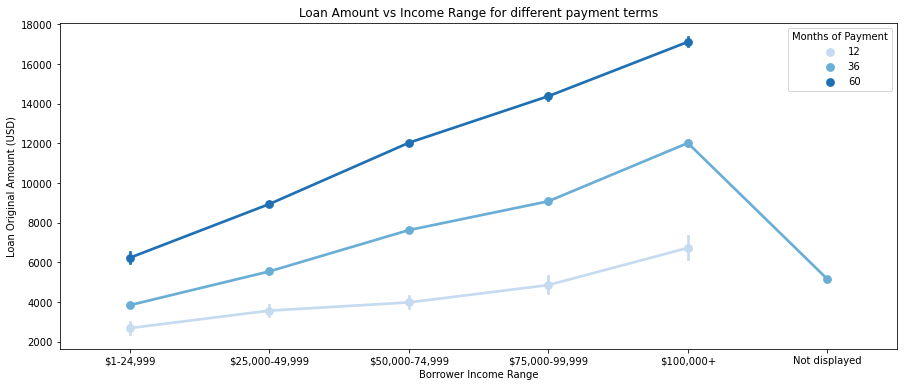

In [4]:
plt.figure(figsize= (15,6))

sb.pointplot(data = df, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Blues' )

# Add some polishing to the graph including the title and axis labels
plt.xlabel('Borrower Income Range')
plt.ylabel('Loan Original Amount (USD)')
plt.title('Loan Amount vs Income Range for different payment terms')
plt.legend(title='Months of Payment'); 


## (Visualization 2)

> ### What is the avarage loan amount for different borrowers Employement Status? Does the trend changes with the change of the loan status? 

> #### We Conclude from the following plot that the completed loans had lower value than the current ones for all employment status of the borrower. It is also worth mentioning that the past due loans (61 - 120) are the highest for the Self Employed & Part timers while it is the lowest for the Retired borrowers. 

In [5]:
# We need to replace values in Employment Status that have same meaning

# x, y represents the items to be changed and the changed list
x = ['Not available', 'Other', 'Self-employed', 'Part-time', 'Retired', 'Not employed']
y = ['Not Available', 'Not Available', 'Self-Employed & Part-Time', 'Self-Employed & Part-Time', 'Retired or Not Employed', 'Retired or Not Employed' ]

# Replace the values
df['EmploymentStatus'].replace(to_replace= x , value= y, inplace=True )

# Convert the column to a Categorial Dtype
Employment_Status_order = ['Employed', 'Full-time',  'Not Available', 'Self-Employed & Part-Time' ,'Retired or Not Employed'  ]
OrderedEmploymentStatus = pd.api.types.CategoricalDtype(ordered = True, categories =  Employment_Status_order )
df['EmploymentStatus'] = df['EmploymentStatus'].astype(OrderedEmploymentStatus)


In [6]:
# We need to replace values in Loan Status that have same meaning

replace_list = ['Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'Cancelled', 'Defaulted', 'FinalPaymentInProgress' , 'Chargedoff' ]
redu_list = ['Past Due (0-60 days)', 'Past Due (0-60 days)', 'Past Due (0-60 days)', 'Past Due (61-120 days)', 'Past Due (61-120 days)', 'Defaulted / Cancelled', 'Defaulted / Cancelled', 'Defaulted / Cancelled', 'Current', 'Defaulted / Cancelled' ]

df['LoanStatus'].replace(to_replace = replace_list , value = redu_list , inplace=True)


# Convert the column to a Categorial Dtype
Loan_status_order = ['Completed', 'Current', 'Past Due (0-60 days)', 'Past Due (61-120 days)','Defaulted / Cancelled'  ]
OrderedStatus = pd.api.types.CategoricalDtype(ordered = True, categories =  Loan_status_order )
df['LoanStatus'] = df['LoanStatus'].astype(OrderedStatus)

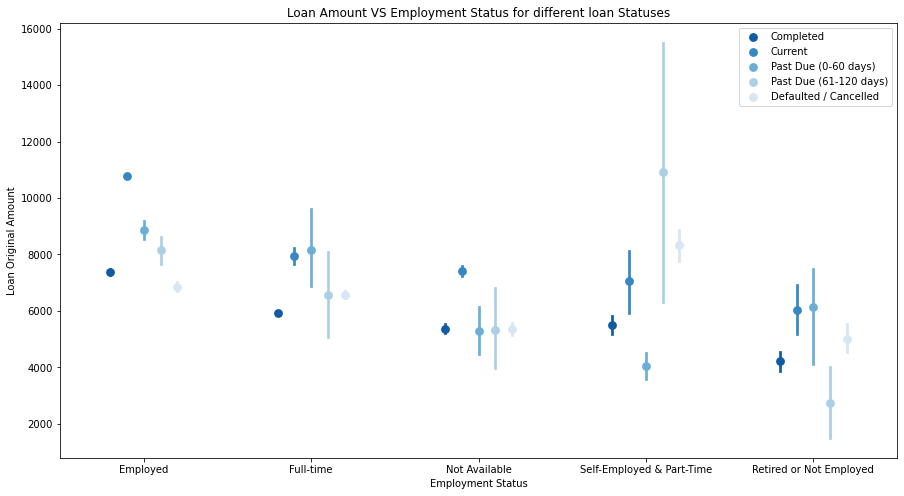

In [7]:
plt.figure(figsize= (15,8))


sb.pointplot(data = df, x = 'EmploymentStatus', y = 'LoanOriginalAmount', hue = 'LoanStatus',
           palette = 'Blues_r', linestyles='' , dodge = 0.4  )

# Polishing the graph by adding title and axis labels. 

plt.xlabel('Employment Status')
plt.ylabel('Loan Original Amount')
plt.title('Loan Amount VS Employment Status for different loan Statuses')
plt.legend();

## (Visualization 3)

> ### What is the mean value of the loan for different Income Range? is it affected by the fact that the borrower is a home-owner? 

> #### The following plot shows that the mean value of the loan increases with the increase of the income range. It is also noticable that home owners have a higher loans on avarage for all different income ranges. 



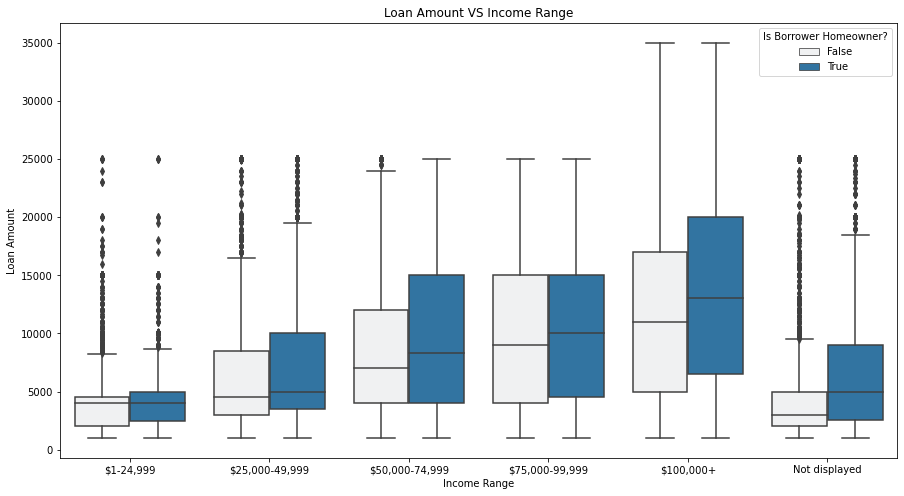

In [8]:
plt.figure(figsize=(15,8))

# set a base color to make all the plot the same color
base_color = sb.color_palette()[0]
sb.boxplot(x='IncomeRange', y = 'LoanOriginalAmount', data=df, order=income_range_order, color=base_color, hue='IsBorrowerHomeowner'); 

# Polishing the graph by adding title and axis labels. 
plt.xlabel('Income Range')
plt.ylabel('Loan Amount')
plt.title('Loan Amount VS Income Range')

plt.legend(title= 'Is Borrower Homeowner?'); 

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!